## KDP 結晶の誘電率の周波数依存性

## ライブラリ・関数

In [133]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [134]:
def plot_epsilon1(x, y, legend):
    f = plt.figure(figsize=(12.8,4.8))
    ax1 = f.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = f.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    ax2.set_xlim(xmin, xmax)

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dielectric function $\epsilon_1(\omega)$")
    ax2.set_xlabel("Frequency (kHz)")
    ax2.set_ylabel("Dielectric function $\epsilon_1(\omega)$")

    for i in [0, 1, 2, 3]:
        ax1.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax1.legend()

    for i in [4, 5, 6, 7]:
        ax2.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax2.legend()

    plt.show()

In [135]:
def plot_epsilon(x, y):
    f = plt.figure()
    ax1 = f.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    # ax1.set_xscale("log")

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dielectric function $\epsilon_1(\omega)$")
    ax1.plot(x, y,
                label = f"@ RT")
    ax1.legend()

    plt.show()

In [136]:
def plot_epsilon2(x, y, legend):
    f = plt.figure(figsize=(12.8,4.8))
    ax1 = f.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = f.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    ax2.set_xlim(xmin, xmax)

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Dielectric function $\epsilon_2(\omega)$")
    ax2.set_xlabel("Frequency (kHz)")
    ax2.set_ylabel("Dielectric function $\epsilon_2(\omega)$")

    for i in [0, 1, 2, 3]:
        ax1.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax1.hlines(0, xmin, xmax, colors="black")
    ax1.legend()

    for i in [4, 5, 6, 7]:
        ax2.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax2.hlines(0, xmin, xmax, colors="black")
    ax2.legend()

    plt.show()

In [137]:
def plot_dissipation(x, y, legend):
    f = plt.figure(figsize=(12.8,4.8))
    ax1 = f.add_subplot(121)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax2 = f.add_subplot(122)
    ax2.yaxis.set_ticks_position('both')
    ax2.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    xmin = np.min(x)
    xmax = np.max(x)
    ax1.set_xlim(xmin, xmax)
    ax2.set_xlim(xmin, xmax)

    ax1.set_yscale("log")
    ax2.set_yscale("log")

    ax1.set_xlabel("Frequency (kHz)")
    ax1.set_ylabel("Loss Factor")
    ax2.set_xlabel("Frequency (kHz)")
    ax2.set_ylabel("Loss Factor")

    for i in [0, 1, 2, 3]:
        ax1.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax1.legend()

    for i in [4, 5, 6, 7]:
        ax2.plot(x[i], y[i],
                label = f"{legend[i]} K")
    ax2.legend()

    plt.show()

In [138]:
def plot_ResFrequancy(x, y1, y2, y3):
    f = plt.figure()
    ax1 = f.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] ='Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'stix'

    ax1.set_xlim(110, 300)

    ax1.set_xlabel("Temperature (K)")
    ax1.set_ylabel("Resonance Frequency (kHz)")
    plt.scatter(x, y1)
    plt.plot(x, y1, label="method 1", color="tab:blue")
    plt.scatter(x, y2)
    plt.plot(x, y2, label="method 2", color="tab:orange")
    plt.scatter(x, y3)
    plt.plot(x, y3, label="method 3", color="tab:green")
    plt.legend()
    plt.show()

In [139]:
def calc_epsilon2(Frequency, Epsilon1):
    Epsilon2 = np.zeros_like(Epsilon1)
    for nfile in range(8):
        for i in range(999):
            for j in range(999):
                if (i == j): continue
                if(j == 0) : df = 0.05
                else : df = Frequency[nfile, j] - Frequency[nfile, j-1]
                #Cauchy の主値積分のところ
                Epsilon2[nfile, i] +=  (Epsilon1[nfile,j]-1)/(Frequency[nfile, j]**2 - Frequency[nfile,i]**2)
            Epsilon2[nfile, i] *= -2*Frequency[nfile,i]/np.pi
    return Epsilon2

## 測定データのインポート

In [140]:
# 標準コンデンサの容量(F)
C0 = 0.4678   / 0.142   * 8.85*10**(-14)
#    面積(cm2)  厚さ(cm)  誘電率(F/cm)

# 130 kHz - 190 kHz まで測定した温度
Temp = np.array([130, 140, 160, 180, 210, 240, 270, 295])
nfile = Temp.size

# グラフで表示する物理量 測定点が1000個あるはずだが最初の一つが読みこめないため 999 となってる
Frequency   = np.zeros((nfile, 999))
Epsilon1    = np.zeros((nfile, 999))
Epsilon2    = np.zeros((nfile, 999))
Dissipation = np.zeros((nfile, 999))

for i in range(nfile):
    df = pd.read_csv(f"2024_10_25/{Temp[i]}K.csv",
                     encoding = 'shift_jis',                          # shift_jis にしないと読み込めない
                     skiprows = 33,                                   # はじめ32行はヘッダー情報
                     usecols  = [2, 4, 5])                            # 2行目が周波数、4行目がCp、5行目がD

    Frequency[i]    = df.iloc[:,0].to_numpy() / 10**3 # kHz に換算
    Epsilon1[i]     = df.iloc[:,1].to_numpy() / C0
    Dissipation[i]  = df.iloc[:,2].to_numpy()


df = pd.read_csv("2024_10_25/a1k-1M_RT.csv",
                     encoding = 'shift_jis',                          # shift_jis にしないと読み込めない
                     skiprows = 33,                                   # はじめ32行はヘッダー情報
                     usecols  = [2, 4, 5])                            # 2行目が周波数、4行目がCp、5行目がD

Frequency_RT    = df.iloc[:,0].to_numpy() / 10**3 # kHz に換算
Epsilon1_RT     = df.iloc[:,1].to_numpy() / C0
Dissipation_RT  = df.iloc[:,2].to_numpy()

## 解析

In [141]:
# クラマスクローニッヒを使ったもの
Epsilon2 = calc_epsilon2(Frequency, Epsilon1)

In [142]:
# 損失係数から来たもの
EpD      = np.abs(Epsilon1 * Dissipation)

# 共鳴周波数を誘電率の虚部が最大となる周波数として求める
Frequency_res1 = np.array([])
Frequency_res2 = np.array([])
Frequency_res3 = np.array([])
for i in range(nfile):
    Frequency_res1 = np.append(Frequency_res1, Frequency[i][np.argmax(Epsilon2[i])])
    Frequency_res2 = np.append(Frequency_res2, Frequency[i][np.argmax(Dissipation[i])])
    Frequency_res3 = np.append(Frequency_res3, Frequency[i][np.argmax(EpD[i])])

## 出力

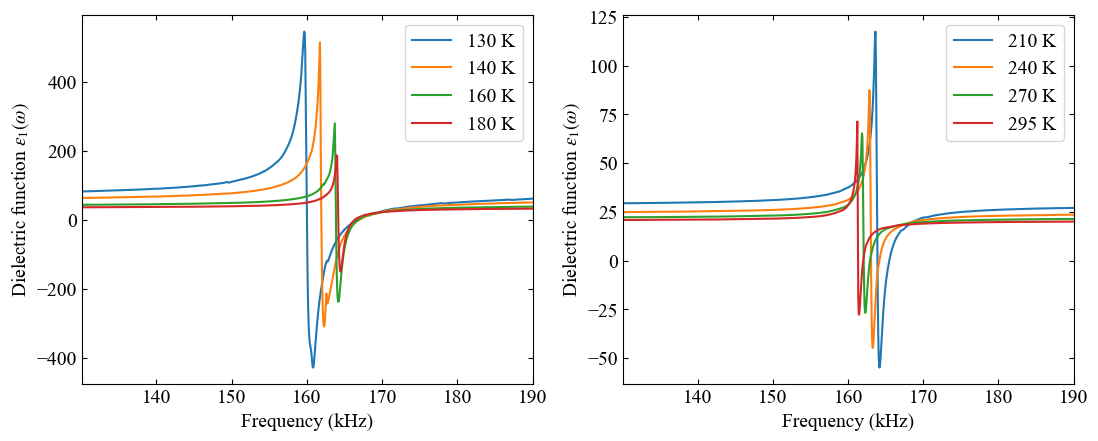

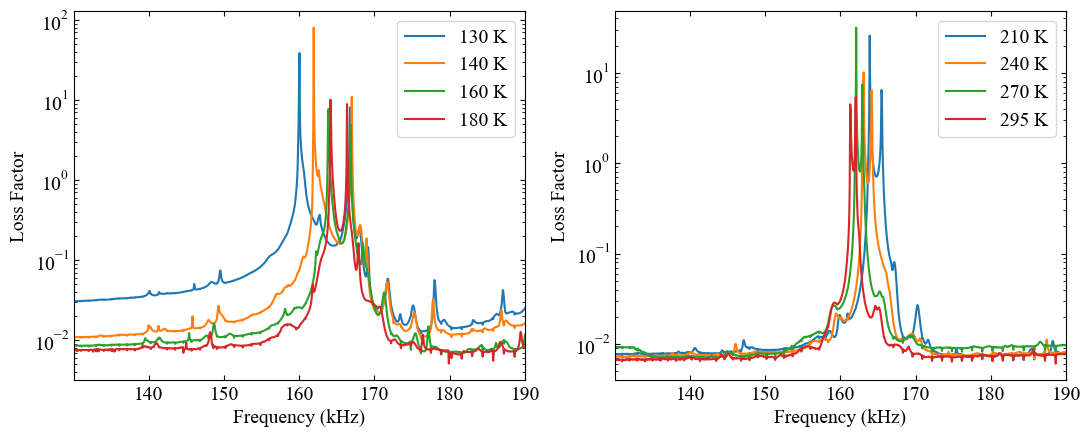

In [143]:
plot_epsilon1(Frequency, Epsilon1, Temp)
plot_dissipation(Frequency, Dissipation, Temp)

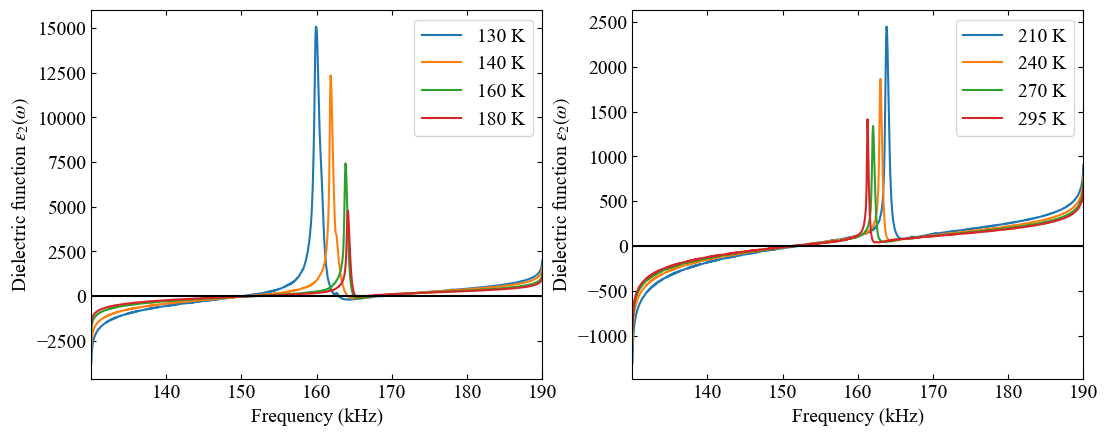

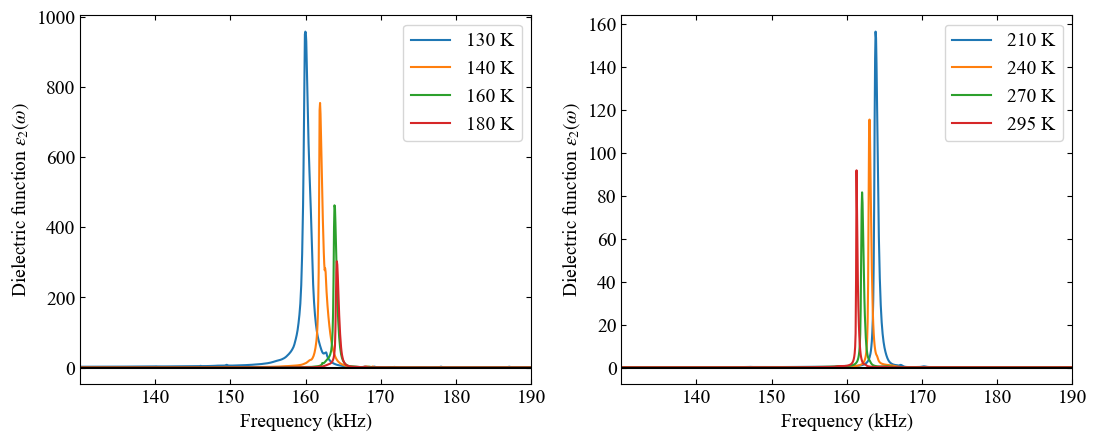

In [144]:
plot_epsilon2(Frequency, Epsilon2, Temp)
plot_epsilon2(Frequency, np.abs(Dissipation*Epsilon1), Temp)

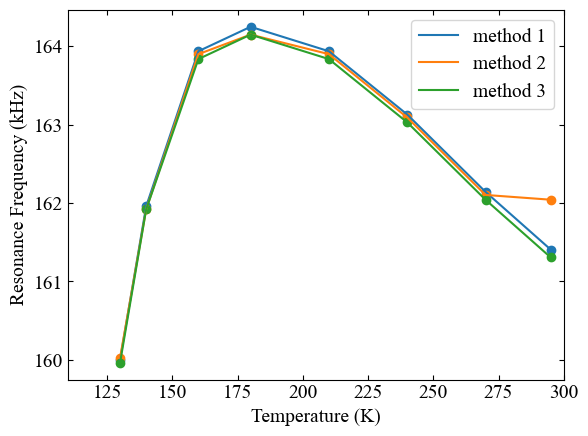

In [145]:
plot_ResFrequancy(Temp, Frequency_res1+0.1, Frequency_res2, Frequency_res3)

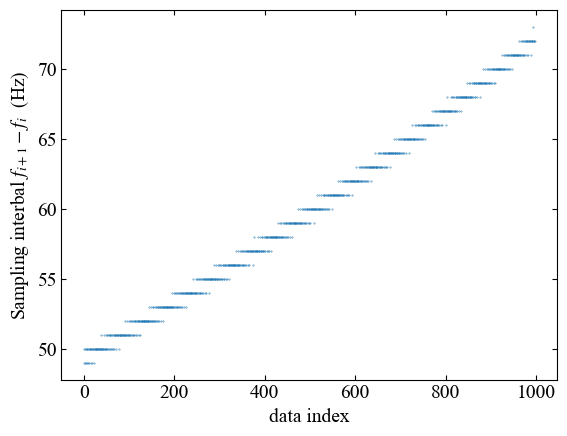

In [146]:
# 目盛を上下作用にセット
f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# フォントの選択
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] ='Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.xlabel("data index")
plt.ylabel("Sampling interbal $f_{i+1}-f_i$  (Hz) ")
plt.scatter(list(range(998)), (Frequency[1,1:]-Frequency[1,:-1])*1000, s=0.1)
plt.show()

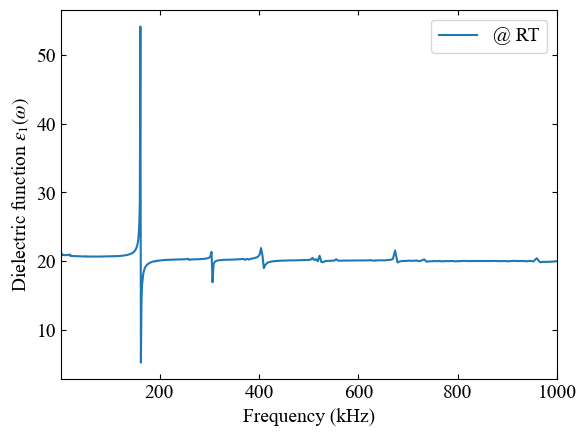

In [147]:
plot_epsilon(Frequency_RT, Epsilon1_RT)